In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [72]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
# change algorithm to either td3 or ppo
#----------------------------------------------------

import glob
# interval = ["point125","point25","point5","point75"]
# interval = ["vzero","vpoint1","vpoint3"]

# itv = interval[3]
itv = "vzero"
algorithm = "ddpg" # "ppo"
visitors = "multi"  # single
network = "64_64_NN" # 300_NN or 64_64_NN or 300_300_NN
# txt_dir = "../SHARCNET/Results/"+visitors + "/" + algorithm + "/" + network+"/new/"+itv+"/"
txt_dir = "../SHARCNET/Results/multi/aug_obs/ddpg/new/"
# pic_dir = "./plots_for_thesis/"+visitors+"/"+algorithm+"/" + network+"/new/"
pic_dir = "./plots_for_thesis/"+visitors+"/aug_obs/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+mode+ "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/multi/aug_obs/ddpg/new/SARA\2019-10-28-145503-0-60\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/aug_obs/ddpg/new/SARA\2019-10-28-145503-1-60\ddpg\ddpg_s0\progress.txt
PLA: 2 files found
../SHARCNET/Results/multi/aug_obs/ddpg/new/PLA\2019-10-26-182416-1-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/aug_obs/ddpg/new/PLA\2019-10-26-182417-0-0\ddpg\ddpg_s0\progress.txt


In [73]:
txt_dir

'../SHARCNET/Results/multi/aug_obs/ddpg/new/'

In [74]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
elif algorithm == "ddpg":
    metrics = ["AverageEpRet", "AverageQVals"]
    col_names = ["return", "Q_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [75]:
all_combined_data['PLA']

,return_run0,return_run1,return_avg,return_std,Q_means_run0,Q_means_run1,Q_means_avg,Q_means_std
0,22.643482,20.516624,21.580053,1.063429,0.633190,0.513422,0.573306,0.059884
1,43.557125,31.539131,37.548128,6.008997,1.352241,1.102318,1.227280,0.124962
2,38.518726,37.206947,37.862837,0.655890,1.656054,1.355894,1.505974,0.150080
3,33.868378,41.513860,37.691119,3.822741,1.800614,1.601255,1.700935,0.099680
4,41.761856,38.952427,40.357141,1.404715,2.113517,1.786480,1.949999,0.163518
5,35.136574,45.285923,40.211248,5.074675,2.411521,2.109002,2.260262,0.151260
6,40.205360,41.541930,40.873645,0.668285,2.761986,2.377254,2.569620,0.192366
7,41.329330,37.344776,39.337053,1.992277,3.265771,2.671819,2.968795,0.296976
8,51.623634,35.188145,43.405890,8.217745,3.799425,2.974272,3.386849,0.412576
9,38.322580,33.479763,35.901172,2.421409,4.349405,3.286030,3.817718,0.531687


save to ./plots_for_thesis/multi/aug_obs/
save to ./plots_for_thesis/multi/aug_obs/


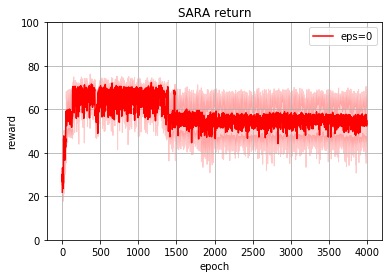

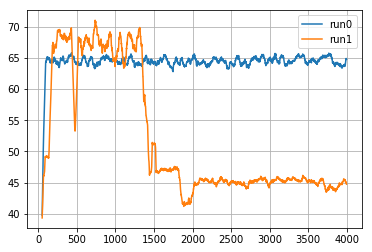

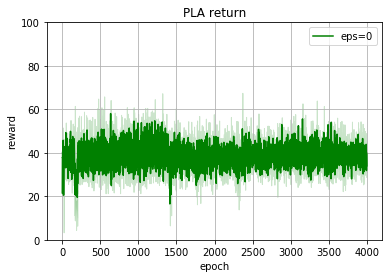

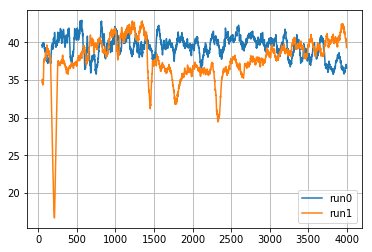

In [76]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
#     label = "[0, "+itv.replace("point","0.")+"]"
    label = "eps="+itv.replace("vpoint","0.").replace("vzero", "0")
    
    plt.figure()
    plt.grid()
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,100])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(pic_dir+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')
    print("save to {}".format(pic_dir))
    
    plt.figure()
    plt.grid()
    for i in range(len(all_data_files[mode])):
        plt.plot(data.index, data[metric+'_run'+str(i)].rolling(window=50).mean(), '-', label="run"+str(i))
    plt.legend(loc="best")


### 2. V_mean

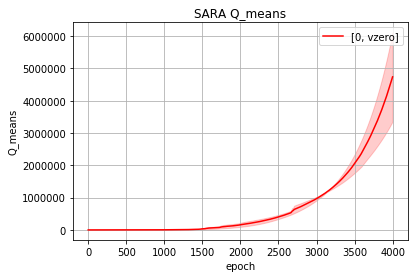

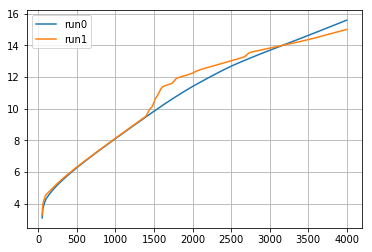

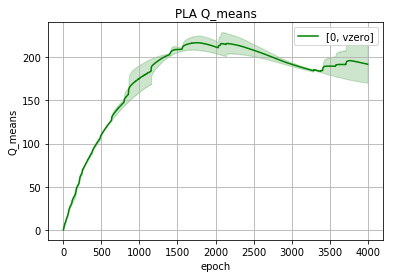

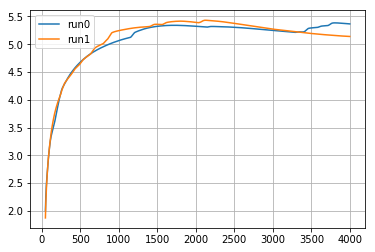

In [77]:
from matplotlib.colors import LogNorm
colors = ['r','g','b']
metric = "Q_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
    label = "[0, "+itv.replace("point","0.")+"]"
    
    plt.figure()
    plt.grid()
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c, label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel(metric)
    plt.savefig(pic_dir+'/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    
    
    plt.figure()
    plt.grid()
    for i in range(len(all_data_files[mode])):
        plt.plot(data.index, np.log(data[metric+'_run'+str(i)]).rolling(window=50).mean(), '-', label="run"+str(i))
    plt.legend(loc="best")

    